In [177]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.warnings.filterwarnings('ignore')
from numpy import nan

In [178]:
df=pd.read_csv("train_house.csv")

In [179]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [181]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing,'data_type':df.dtypes})
pd.set_option('display.max_rows', None)
missing_value_df

column_name  percent_missing data_type
Id                        Id         0.000000     int64
MSSubClass        MSSubClass         0.000000     int64
MSZoning            MSZoning         0.000000    object
LotFrontage      LotFrontage        18.321918   float64
LotArea              LotArea         0.000000     int64
Street                Street         0.000000    object
Alley                  Alley        93.407534    object
LotShape            LotShape         0.000000    object
LandContour      LandContour         0.000000    object
Utilities          Utilities         0.000000    object
LotConfig          LotConfig         0.000000    object
LandSlope          LandSlope         0.000000    object
Neighborhood    Neighborhood         0.000000    object
Condition1        Condition1         0.000000    object
Condition2        Condition2         0.000000    object
BldgType            BldgType         0.000000    object
HouseStyle        HouseStyle         0.000000    object
OverallQual      OverallQual         0.000000     int64
OverallCond      OverallCond         0.000000     int64
YearBuilt          YearBuilt         0.000000     int64
YearRemodAdd    YearRemodAdd         0.000000     int64
RoofStyle          RoofStyle         0.000000    object
RoofMatl            RoofMatl         0.000000    object
Exterior1st      Exterior1st         0.000000    object
Exterior2nd      Exterior2nd         0.000000    object
MasVnrType        MasVnrType         0.599315    object
MasVnrArea        MasVnrArea         0.599315   float64
ExterQual          ExterQual         0.000000    object
ExterCond          ExterCond         0.000000    object
Foundation        Foundation         0.000000    object
BsmtQual            BsmtQual         2.568493    object
BsmtCond            BsmtCond         2.568493    object
BsmtExposure    BsmtExposure         2.654110    object
BsmtFinType1    BsmtFinType1         2.568493    object
BsmtFinSF1        BsmtFinSF1         0.000000     int64
BsmtFinType2    BsmtFinType2         2.654110    object
BsmtFinSF2        BsmtFinSF2         0.000000     int64
BsmtUnfSF          BsmtUnfSF         0.000000     int64
TotalBsmtSF      TotalBsmtSF         0.000000     int64
Heating              Heating         0.000000    object
HeatingQC          HeatingQC         0.000000    object
CentralAir        CentralAir         0.000000    object
Electrical        Electrical         0.000000    object
1stFlrSF            1stFlrSF         0.000000     int64
2ndFlrSF            2ndFlrSF         0.000000     int64
LowQualFinSF    LowQualFinSF         0.000000     int64
GrLivArea          GrLivArea         0.000000     int64
BsmtFullBath    BsmtFullBath         0.000000     int64
BsmtHalfBath    BsmtHalfBath         0.000000     int64
FullBath            FullBath         0.000000     int64
HalfBath            HalfBath         0.000000     int64
BedroomAbvGr    BedroomAbvGr         0.000000     int64
KitchenAbvGr    KitchenAbvGr         0.000000     int64
KitchenQual      KitchenQual         0.000000    object
TotRmsAbvGrd    TotRmsAbvGrd         0.000000     int64
Functional        Functional         0.000000    object
Fireplaces        Fireplaces         0.000000     int64
FireplaceQu      FireplaceQu        47.174658    object
GarageType        GarageType         5.479452    object
GarageYrBlt      GarageYrBlt         5.479452   float64
GarageFinish    GarageFinish         5.479452    object
GarageCars        GarageCars         0.000000     int64
GarageArea        GarageArea         0.000000     int64
GarageQual        GarageQual         5.479452    object
GarageCond        GarageCond         5.479452    object
PavedDrive        PavedDrive         0.000000    object
WoodDeckSF        WoodDeckSF         0.000000     int64
OpenPorchSF      OpenPorchSF         0.000000     int64
EnclosedPorch  EnclosedPorch         0.000000     int64
3SsnPorch          3SsnPorch         0.000000     int64
ScreenPorch      ScreenPorch         0.00

In [182]:
missing_value_df[missing_value_df["percent_missing"]>70]
#the below columns have value missing more than 70%, so we will drop these columns

column_name  percent_missing data_type
Alley              Alley        93.407534    object
PoolQC            PoolQC        99.400685    object
Fence              Fence        79.708904    object
MiscFeature  MiscFeature        96.232877    object

In [183]:
df.drop(columns=["Alley","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [184]:
#Treating other columns with missing values
missing_value_df[missing_value_df["percent_missing"]>0]


column_name  percent_missing data_type
LotFrontage    LotFrontage        18.321918   float64
Alley                Alley        93.407534    object
MasVnrType      MasVnrType         0.599315    object
MasVnrArea      MasVnrArea         0.599315   float64
BsmtQual          BsmtQual         2.568493    object
BsmtCond          BsmtCond         2.568493    object
BsmtExposure  BsmtExposure         2.654110    object
BsmtFinType1  BsmtFinType1         2.568493    object
BsmtFinType2  BsmtFinType2         2.654110    object
FireplaceQu    FireplaceQu        47.174658    object
GarageType      GarageType         5.479452    object
GarageYrBlt    GarageYrBlt         5.479452   float64
GarageFinish  GarageFinish         5.479452    object
GarageQual      GarageQual         5.479452    object
GarageCond      GarageCond         5.479452    object
PoolQC              PoolQC        99.400685    object
Fence                Fence        79.708904    object
MiscFeature    MiscFeature        96.232877    object

In [185]:
#to treat missing value for object data type we will use mode.
columns=["MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond"]
for i in columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [186]:
#For treating float data type we will use median 
columns=["LotFrontage","MasVnrArea","GarageYrBlt"]
for i in columns:
    df[i]=df[i].fillna(df[i].median())

In [187]:
for col in df:
    print(col,"--",df[col].nunique())
    #printing unique values of the dataframe

Id -- 1168
MSSubClass -- 15
MSZoning -- 5
LotFrontage -- 106
LotArea -- 892
Street -- 2
LotShape -- 4
LandContour -- 4
Utilities -- 1
LotConfig -- 5
LandSlope -- 3
Neighborhood -- 25
Condition1 -- 9
Condition2 -- 8
BldgType -- 5
HouseStyle -- 8
OverallQual -- 10
OverallCond -- 9
YearBuilt -- 110
YearRemodAdd -- 61
RoofStyle -- 6
RoofMatl -- 8
Exterior1st -- 14
Exterior2nd -- 15
MasVnrType -- 4
MasVnrArea -- 283
ExterQual -- 4
ExterCond -- 5
Foundation -- 6
BsmtQual -- 4
BsmtCond -- 4
BsmtExposure -- 4
BsmtFinType1 -- 6
BsmtFinSF1 -- 551
BsmtFinType2 -- 6
BsmtFinSF2 -- 122
BsmtUnfSF -- 681
TotalBsmtSF -- 636
Heating -- 6
HeatingQC -- 5
CentralAir -- 2
Electrical -- 5
1stFlrSF -- 669
2ndFlrSF -- 351
LowQualFinSF -- 21
GrLivArea -- 746
BsmtFullBath -- 4
BsmtHalfBath -- 3
FullBath -- 4
HalfBath -- 3
BedroomAbvGr -- 8
KitchenAbvGr -- 4
KitchenQual -- 4
TotRmsAbvGrd -- 12
Functional -- 7
Fireplaces -- 4
FireplaceQu -- 5
GarageType -- 6
GarageYrBlt -- 97
GarageFinish -- 3
GarageCars -- 5
Gara

In [188]:
# we can drop Id as it has unique values for every and would not be much helpful in predicting sale price
df.drop(columns=["Id"],axis=1,inplace=True)

In [189]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]
#removing the columns with only one unique value

In [ ]:
Visualization

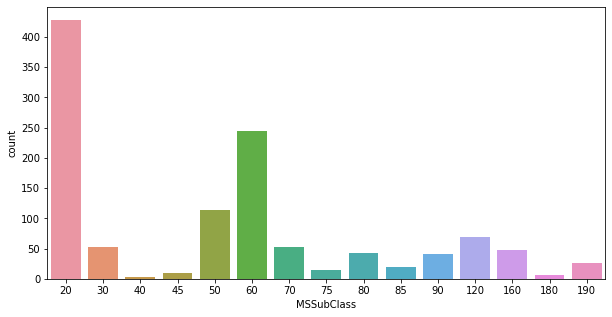

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(df["MSSubClass"])
plt.show()


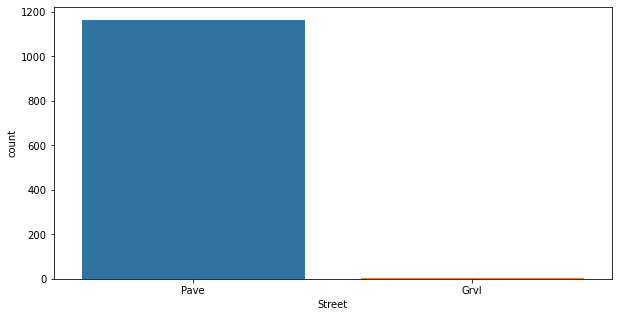

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(df["Street"])
plt.show()

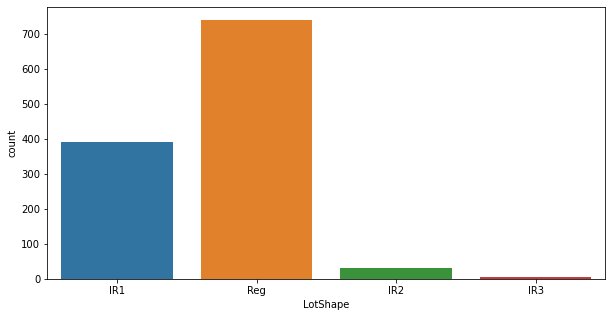

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(df["LotShape"])
plt.show()

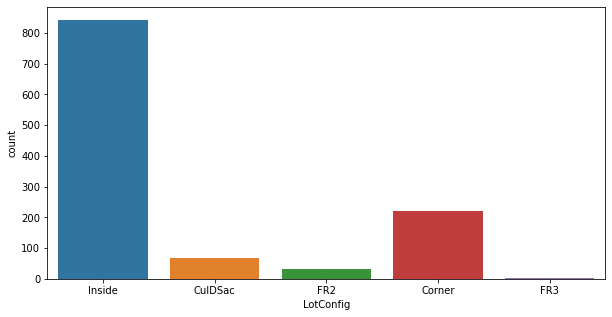

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(df["LotConfig"])
plt.show()

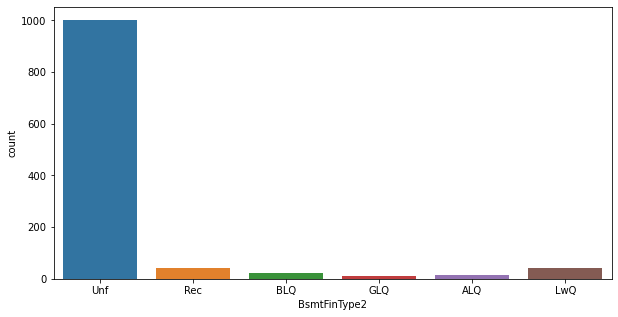

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(df["BsmtFinType2"])
plt.show()

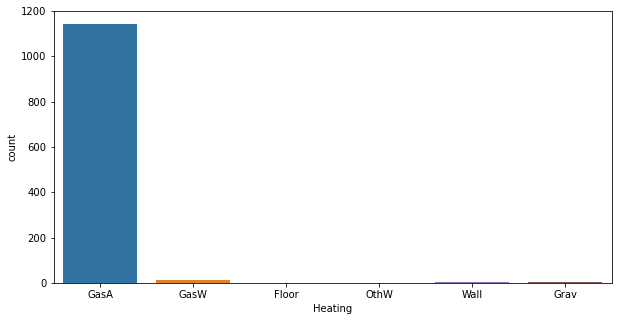

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(df["Heating"])
plt.show()

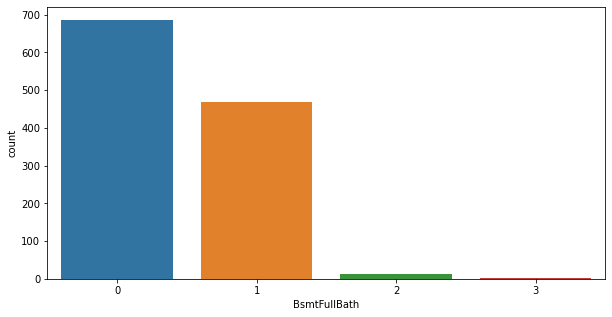

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(df["BsmtFullBath"])
plt.show()

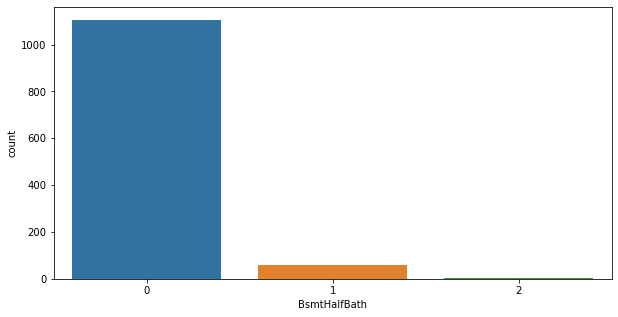

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(df["BsmtHalfBath"])
plt.show()

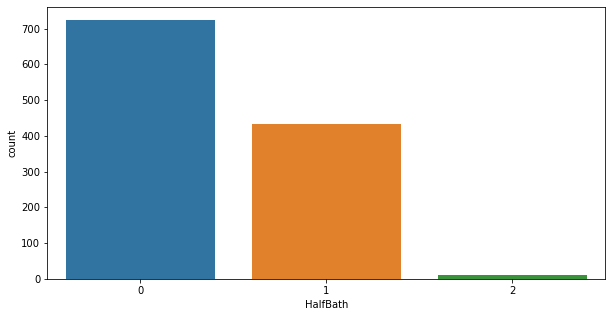

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(df["HalfBath"])
plt.show()

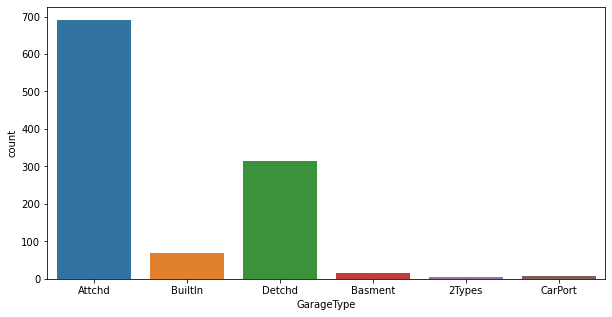

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(df["GarageType"])
plt.show()
#Attach type has maximum value

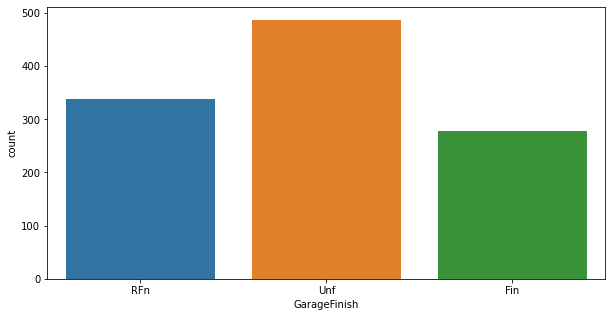

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(df["GarageFinish"])
plt.show()

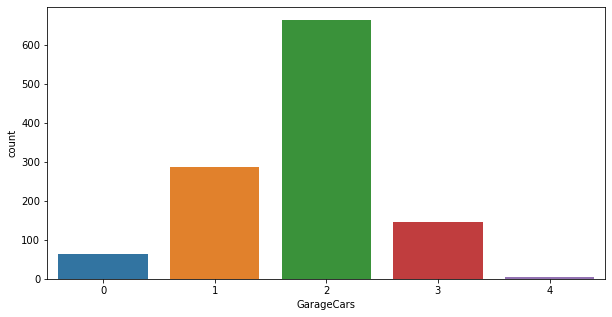

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(df["GarageCars"])
plt.show()

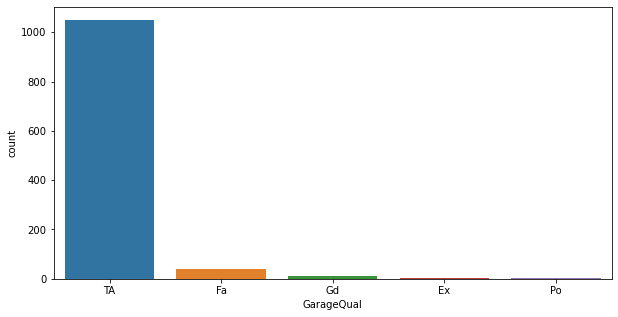

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(df["GarageQual"])
plt.show()
#ypical type of garage qual has highest value and the others have very less value so this columnw ont also be of much help

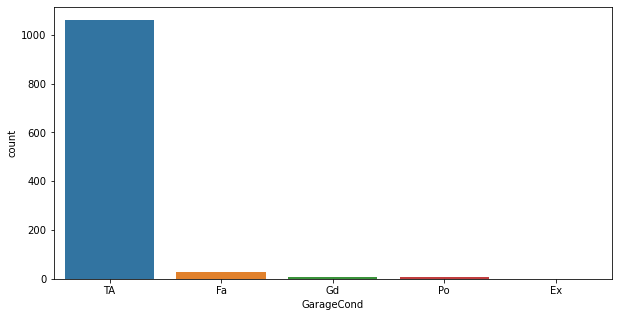

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(df["GarageCond"])
plt.show()
#similayly for this one the typical type has maximum value and other have very least value

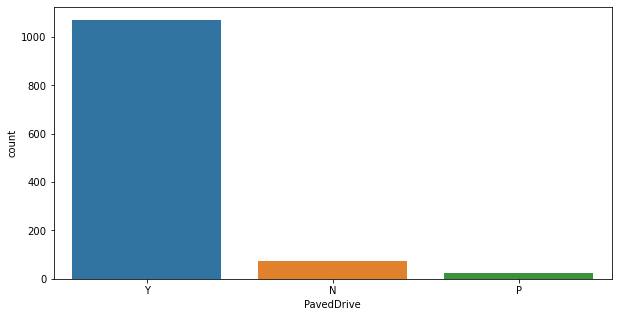

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(df["PavedDrive"])
plt.show()
#paved type have maximum values and others are very less so we can drop this column 

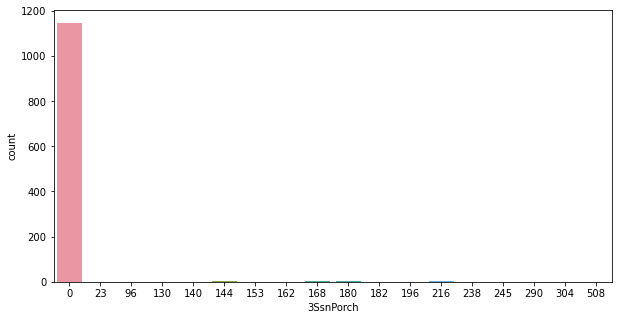

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(df["3SsnPorch"])
plt.show()
#three seasn porch has maximum value and 168 and 180 have one or two value

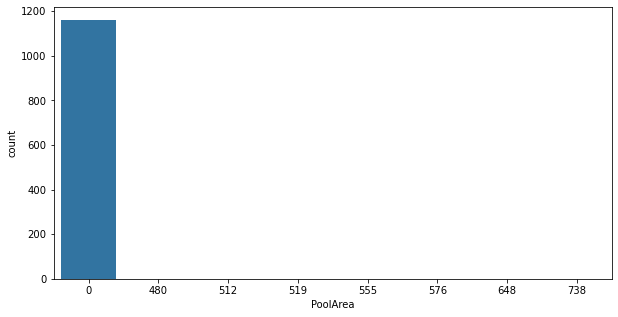

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(df["PoolArea"])
plt.show()
#this column will also be much of help as there is only one kind of value

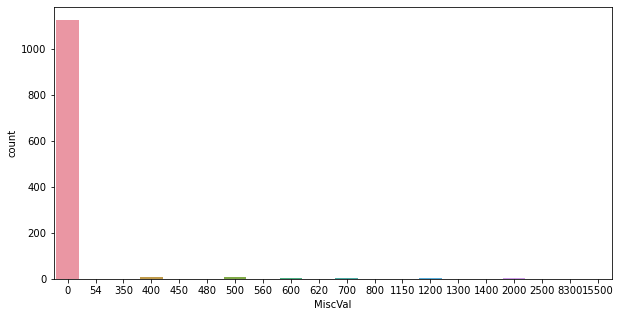

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(df["MiscVal"])
plt.show()
#the count of 0 has maximum value and will not be of much help 

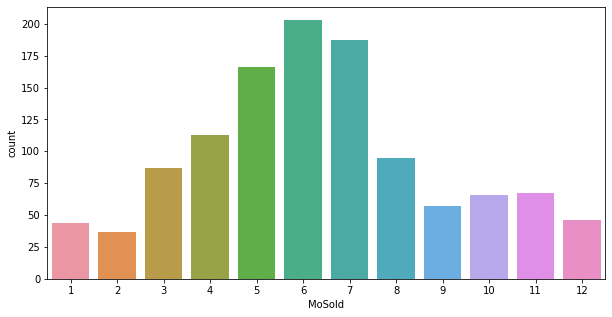

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(df["MoSold"])
plt.show()
#the sale is maximum for the months ,6 and 7

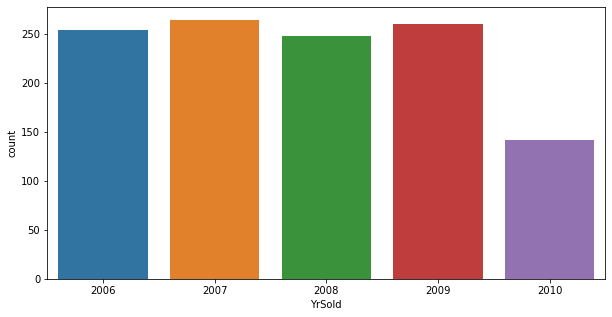

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(df["YrSold"])
plt.show()
#the maximum number sold is in th year 2007 and the minimum in the year 2010

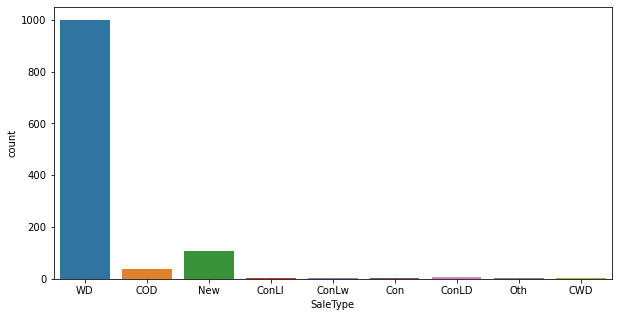

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(df["SaleType"])
plt.show()
#the Warranty Deed - Conventional has maximum value followed by other and least in Warranty Deed - Cash

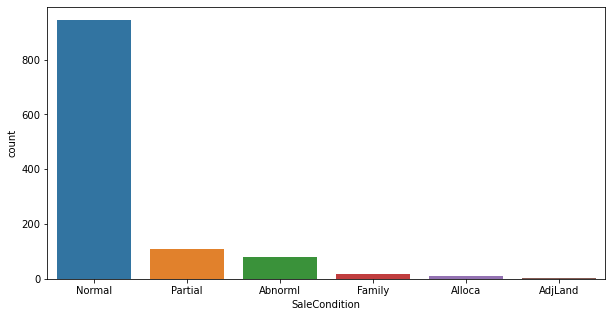

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(df["SaleCondition"])
plt.show()
#he normal sale is maximum among the others

In [191]:
df.drop(columns=["Functional","3SsnPorch","PoolArea","PavedDrive", "GarageCond", "MiscVal","SaleType"],axis=2,inplace=True)

MoSold
1     11.907619
2     12.076585
3     11.988614
4     11.967150
5     11.996227
6     12.025558
7     12.059634
8     12.053393
9     12.137994
10    12.013792
11    12.072251
12    12.099658
Name: SalePrice, dtype: float64


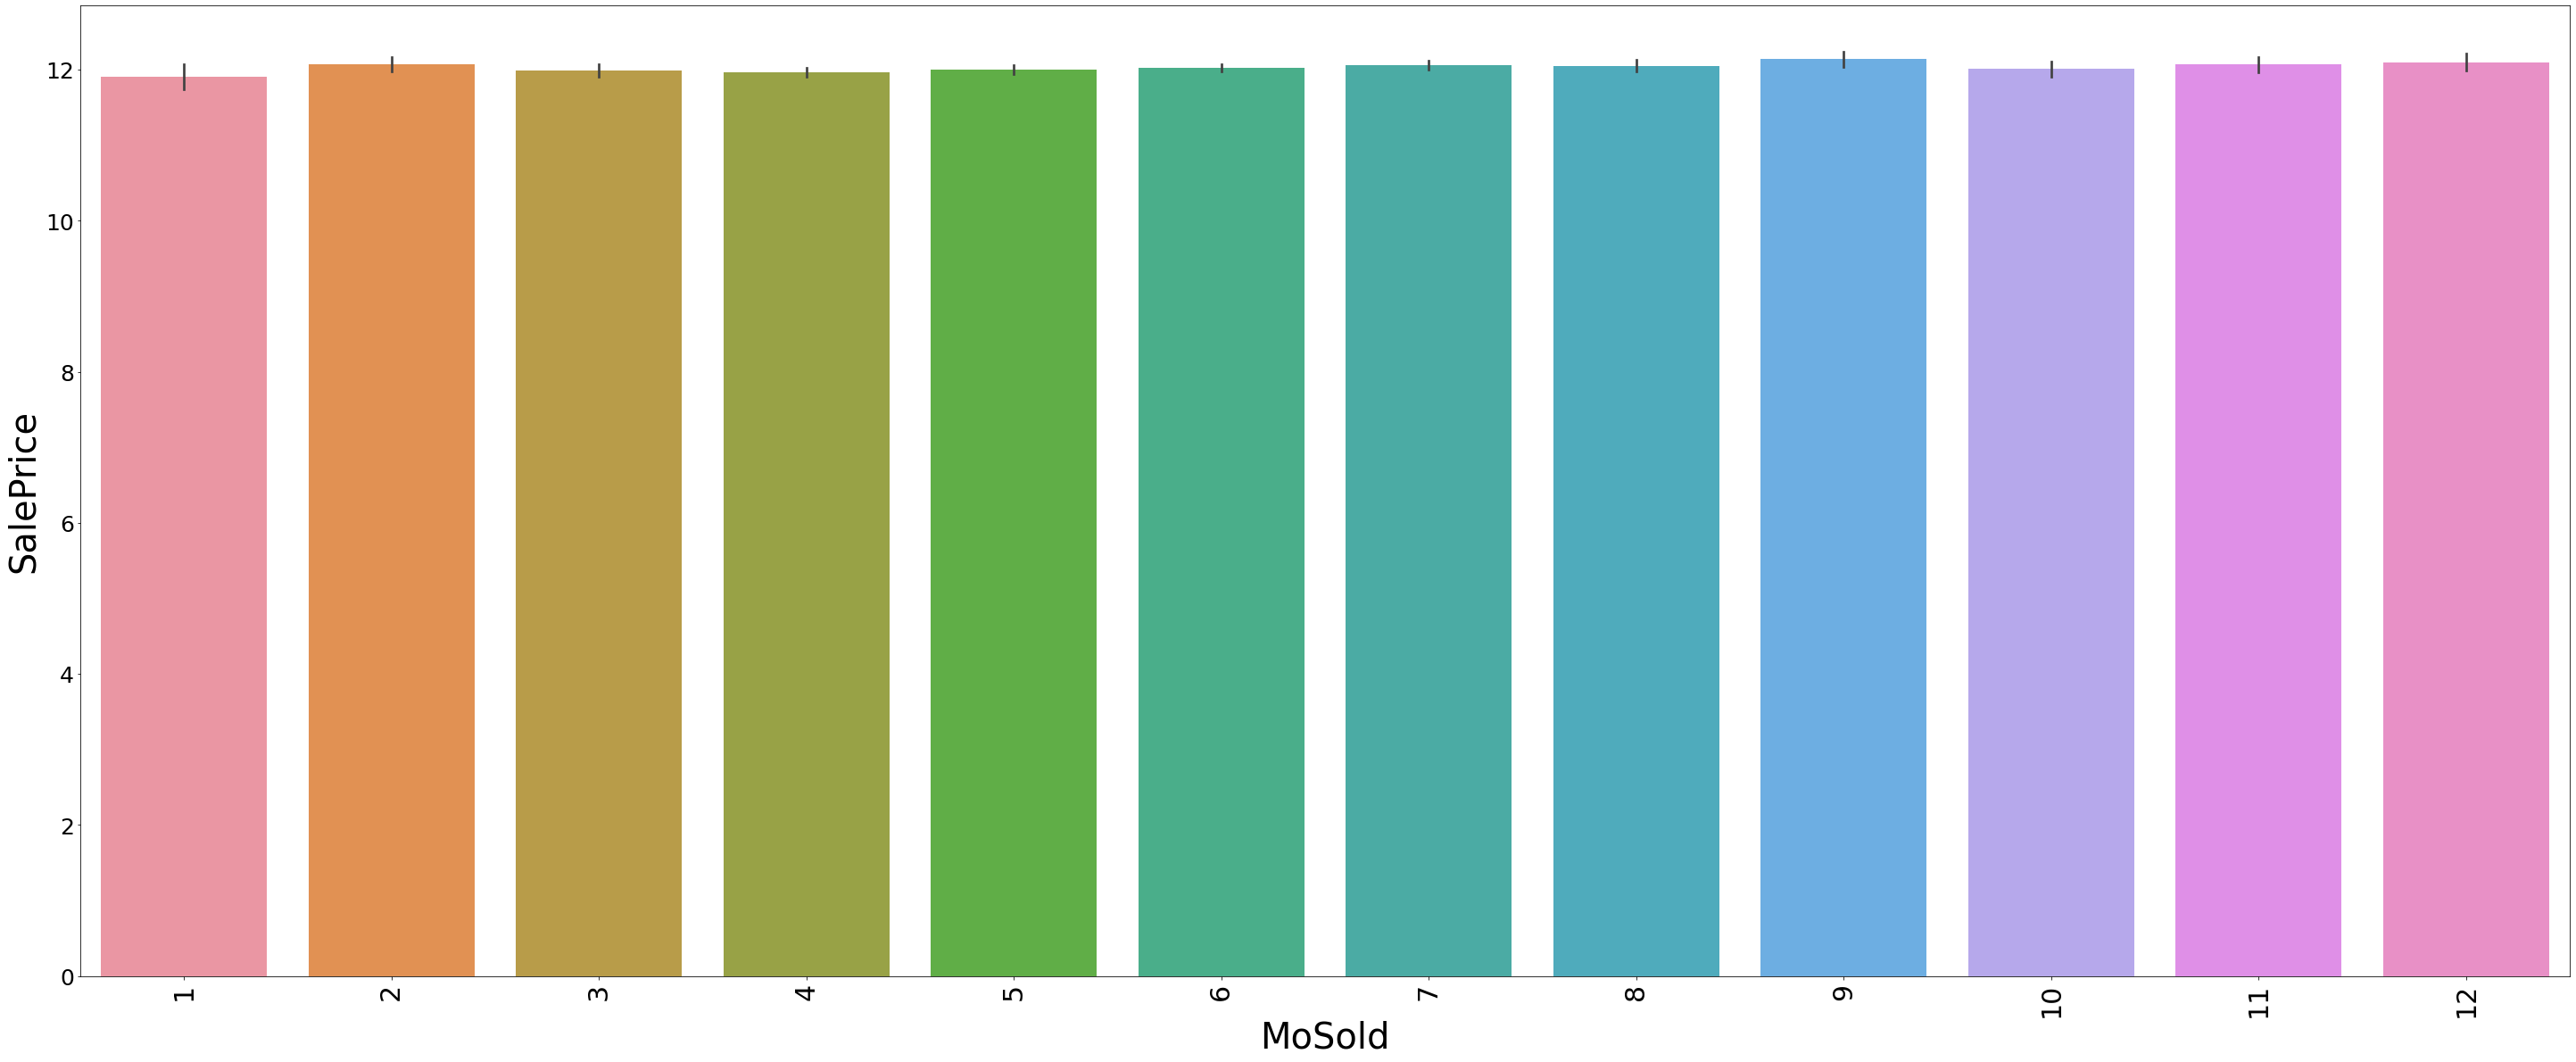

In [210]:
plt.figure(figsize=(50,20))
plt.xlabel("MoSold", fontsize=40)
plt.ylabel("SalePrice", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="MoSold",y="SalePrice",data=df)
print(df.groupby("MoSold").SalePrice.mean())

SaleCondition
0    11.786785
1    11.529157
2    11.914465
3    11.874934
4    12.008321
5    12.440936
Name: SalePrice, dtype: float64


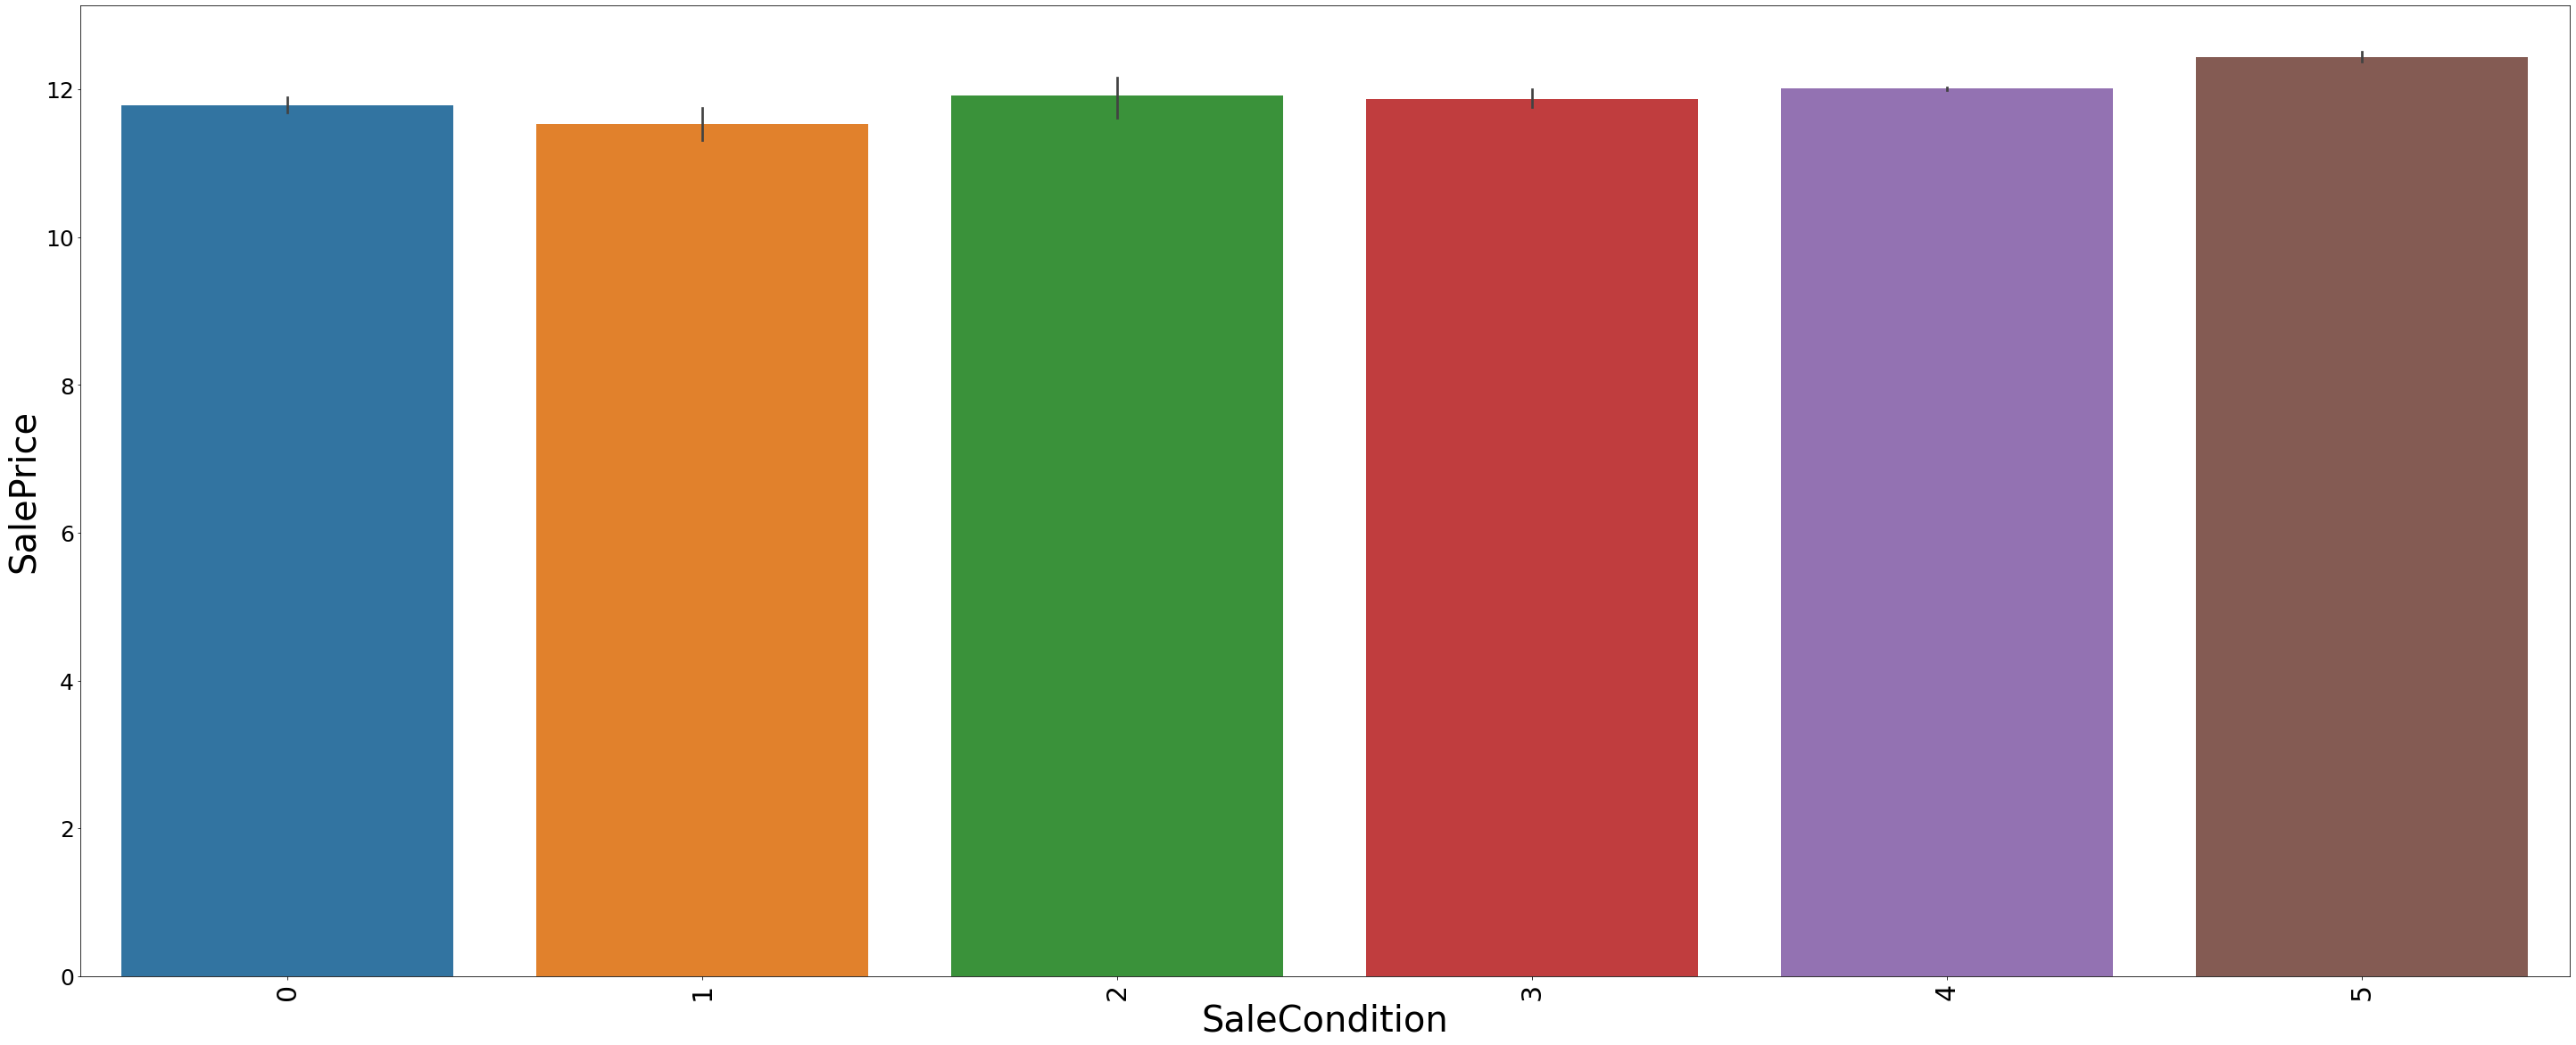

In [214]:
plt.figure(figsize=(50,20))
plt.xlabel("SaleCondition", fontsize=40)
plt.ylabel("SalePrice", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=25)
sns.barplot(x="SaleCondition",y="SalePrice",data=df)
print(df.groupby("SaleCondition").SalePrice.mean())

In [192]:
column1=["SaleCondition",'LotShape', 'LandContour', 'LotConfig', 'LandSlope', "Street",'Neighborhood','Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual','ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',"Electrical",
       'BsmtFinType1',"BsmtFinType2",'Heating', 'HeatingQC', 'CentralAir','KitchenQual','FireplaceQu', 'GarageType','GarageFinish','GarageQual']

In [193]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in column1:
    df[column] = labelencoder.fit_transform(df[column])

In [194]:
correlated_features = set()
correlation_matrix = df.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.90:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
    #highly correlated columns

In [195]:
print(correlated_features)
#blank set there are no two columns which are highly correlated 

set()


In [196]:
corr_matrix=df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.460535
Fireplaces       0.459611
GarageYrBlt      0.453840
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323851
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
ScreenPorch      0.100284
Exterior2nd      0.097541
FireplaceQu      0.082705
GarageQual  

In [198]:
df.drop(columns=["MasVnrType","BsmtHalfBath","LowQualFinSF","MSZoning","YrSold","LotConfig","MSSubClass","OverallCond","BldgType"],axis=1,inplace=True)      

In [199]:
df.skew()

LotFrontage       2.733440
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
HouseStyle        0.285680
OverallQual       0.175082
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrArea        2.835718
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtFinType2     -3.615783
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
Heating          10.103609
HeatingQC         0.449933
CentralAir       -3.475188
Electrical       -3.104209
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
B

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1168 non-null   float64
 1   LotArea        1168 non-null   int64  
 2   Street         1168 non-null   object 
 3   LotShape       1168 non-null   int32  
 4   LandContour    1168 non-null   int32  
 5   LandSlope      1168 non-null   int32  
 6   Neighborhood   1168 non-null   int32  
 7   Condition1     1168 non-null   int32  
 8   Condition2     1168 non-null   int32  
 9   HouseStyle     1168 non-null   int32  
 10  OverallQual    1168 non-null   int64  
 11  YearBuilt      1168 non-null   int64  
 12  YearRemodAdd   1168 non-null   int64  
 13  RoofStyle      1168 non-null   int32  
 14  RoofMatl       1168 non-null   int32  
 15  Exterior1st    1168 non-null   int32  
 16  Exterior2nd    1168 non-null   int32  
 17  MasVnrArea     1168 non-null   float64
 18  ExterQua

In [200]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>1:
        df[col]=np.log1p(df[col])

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   float64
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   int32  
 6   LandContour    1168 non-null   int32  
 7   LotConfig      1168 non-null   int32  
 8   LandSlope      1168 non-null   int32  
 9   Neighborhood   1168 non-null   int32  
 10  Condition1     1168 non-null   int32  
 11  Condition2     1168 non-null   int32  
 12  BldgType       1168 non-null   int32  
 13  HouseStyle     1168 non-null   int32  
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  YearRemodAdd   1168 non-null   int64  
 18  RoofStyl

In [201]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3
df_av =df[(z < 3).all(axis=1)]
#removing outliers
print(df_av.shape,"\n",df.shape)
#printing the shape after removing outliers
# we wont be removing outliers in this as we are getting rid of so much data

(603, 59) 
 (1168, 59)


In [202]:
df_x=df.drop(columns=['SalePrice'],axis=1)
y=df['SalePrice']

In [203]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
#scaling the input column

In [204]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [205]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 42,test_size=0.20)

In [206]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print("score of ",m, "is:",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("r2 score :",r2_score(y_test,predm))
    print("\n")

score of  LinearRegression() is: 0.892017540921385
r2 score : 0.8317426021538932


score of  DecisionTreeRegressor() is: 1.0
r2 score : 0.6819378483516279


score of  KNeighborsRegressor() is: 0.8486211940194535
r2 score : 0.7699902635976034


score of  SVR() is: 0.9612211599630993
r2 score : 0.8158764634307292


score of  Lasso() is: 0.0
r2 score : -0.0004032372617068791


score of  Ridge() is: 0.8920162642055253
r2 score : 0.8319831928499244


score of  ElasticNet() is: 0.0
r2 score : -0.0004032372617068791




In [207]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsRegressor()
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
model1.fit(x,y)
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}


In [211]:
knn=KNeighborsRegressor(algorithm= 'auto', leaf_size= 1, n_jobs= -1, n_neighbors= 7, weights= 'distance')
knn.fit(x_train,y_train)
ypred=knn.predict(x_test)
print("score of ",knn, "is:",knn.score(x_train,y_train))
print("r2 score :",r2_score(y_test,ypred))
print("\n")

score of  KNeighborsRegressor(leaf_size=1, n_jobs=-1, n_neighbors=7, weights='distance') is: 1.0
r2 score : 0.7769314726614023


